# Dataproject: Comparison of Covid19 death tolls in Scandinavia

### Table of Contents

* 1. Introduction
* 2. Coding
* 3. Analysis
    * 3.1 Death tolls in Scandinavia
    * 3.2 The Danish Death Multiplier
* 4. Discussion
    * 4.1 Demography as an explanatory factor

## 1. Introduction

The Scandinavian countries manage the corona crisis in different ways. Denmark has responded quickly with far-reaching goverment initiatives whereas Sweden is against the so-called "authoritarian" strategy. For this reason, it is interesting to investigate the scandinavian death tolls associated with their different national attitudes towards the management of the corona crisis. Note that covid19 might be a "harvesting" phenomenon regarding cause of death.

# 2. Coding

In [1]:
#################### imports ####################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#################### api ####################

# covid-19 data
#install >>> pip install COVID19Py <<< in anaconda
import COVID19Py
covid19 = COVID19Py.COVID19(data_source="jhu")

# world bank data
#install >>> pip install pandas-datareader <<< in anaconda
from pandas_datareader import wb

#################### dataframes ####################

##### COVID-19 deaths ######

#denmark
covid_dk = covid19.getLocationByCountryCode("DK", timelines=True)
deaths_dk_dict=covid_dk[2]['timelines']['deaths']['timeline']
deaths_dk_df=pd.DataFrame.from_dict(deaths_dk_dict,orient='index',columns=['deaths'])
deaths_dk_df=deaths_dk_df.rename(columns={'deaths':'denmark'})

# sweden
covid_se = covid19.getLocationByCountryCode("SE", timelines=True)
deaths_se_dict=covid_se[0]['timelines']['deaths']['timeline']
deaths_se_df=pd.DataFrame.from_dict(deaths_se_dict,orient='index',columns=['deaths'])
deaths_se_df=deaths_se_df.rename(columns={'deaths':'sweden'})

# norway
covid_no = covid19.getLocationByCountryCode("NO", timelines=True)
deaths_no_dict=covid_no[0]['timelines']['deaths']['timeline']
deaths_no_df=pd.DataFrame.from_dict(deaths_no_dict,orient='index',columns=['deaths'])
deaths_no_df=deaths_no_df.rename(columns={'deaths':'norway'})

# scandinavia
covid_deaths=pd.concat([deaths_dk_df, deaths_se_df, deaths_no_df], axis=1, sort=False)
covid_deaths=covid_deaths.rename_axis('date')
covid_deaths=covid_deaths[(covid_deaths.T !=0).any()]
new_index={'2020-03-11T00:00:00Z':'2020-03-11','2020-03-12T00:00:00Z': '2020-03-12','2020-03-13T00:00:00Z':'2020-03-13','2020-03-14T00:00:00Z':'2020-03-14','2020-03-15T00:00:00Z':'2020-03-15','2020-03-16T00:00:00Z':'2020-03-16','2020-03-17T00:00:00Z':'2020-03-17','2020-03-18T00:00:00Z':'2020-03-18','2020-03-19T00:00:00Z':'2020-03-19','2020-03-20T00:00:00Z':'2020-03-20','2020-03-21T00:00:00Z':'2020-03-21','2020-03-22T00:00:00Z':'2020-03-22','2020-03-23T00:00:00Z':'2020-03-23','2020-03-24T00:00:00Z':'2020-03-24','2020-03-25T00:00:00Z':'2020-03-25'}
covid_deaths=covid_deaths.rename(index=new_index)

# creating ratios
covid_deaths['DK/SE']=(covid_deaths['denmark']/covid_deaths['sweden'])
covid_deaths['DK/NO']=(covid_deaths['denmark']/covid_deaths['norway'])

# splitting dataframe
covid_deaths_ratio=covid_deaths.drop(['denmark','sweden','norway'],axis=1)
covid_deaths_absolute=covid_deaths.drop(['DK/SE','DK/NO'],axis=1)


##### demography (world bank data) #####

# old people
wb_oldpop = wb.download(indicator='SP.POP.65UP.TO.ZS', country=['DK','SE','NO'], start=2018, end=2018)
wb_oldpop.rename(columns= {'SP.POP.65UP.TO.ZS':'old people'},inplace=True)
wb_oldpop.reset_index(inplace=False)
wb_oldpop=wb_oldpop.sort_values(['old people'])

# population density
wb_popden = wb.download(indicator='en.pop.dnst', country=['DK','SE','NO'], start=2018, end=2018)
wb_popden.rename(columns= {'en.pop.dnst':'population density'},inplace=True)
wb_popden.reset_index(inplace=False)
wb_popden=wb_popden.sort_values(['population density'])

# wb demo data
demo=pd.concat([wb_oldpop, wb_popden], axis=1, sort=False)

# 3. Analysis

#### 3.1 Death tolls in Scandinavia

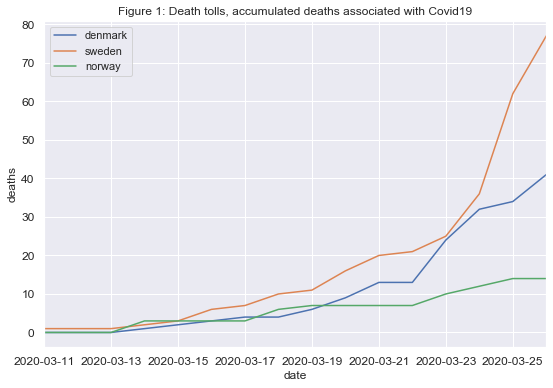

In [12]:
sns.set(color_codes=True)
dx = covid_deaths_absolute.plot.line(figsize = (9,6), title = "Figure 1: Death tolls, accumulated deaths associated with Covid19")
dx.set_xlabel('date')
dx.set_ylabel('deaths')
dx.tick_params(axis='both', which='major', labelsize=12)

The curves exhibit the following trends
   * Norway: linear
   * Sweden: exponential
   * Denmark: linear with a strucural break around 2020-03-18

### 3.2 The Danish Death Multiplier

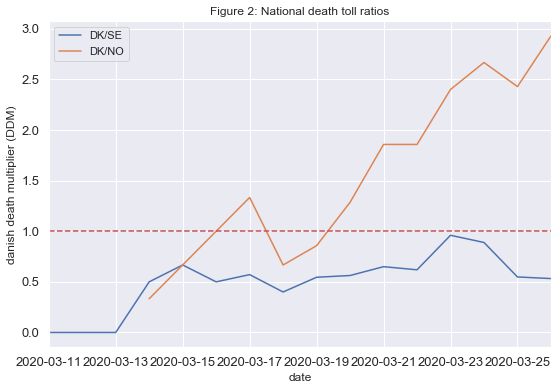

In [4]:
sns.set(color_codes=True)
dx = covid_deaths_ratio.plot.line(figsize = (9,6), title = "Figure 2: National death toll ratios")
dx.set_xlabel('date')
dx.set_ylabel('danish death multiplier (DDM)')
dx.tick_params(axis='both', which='major', labelsize=13)
dx.axhline(1, color='r',linestyle='--')

The DDM exhibits the following trend

* in relation to Norway: linear (from DDM<0.5 in 2020-03-14 to DDM=3 in 2020-03-26)
* in relation to Sweden: constant (around DDM=0.5) 

# 4. Discussion

As we have seen, the swedish (norwegian) death toll has exploded (remained stabel) over the past few days. When considering the death tolls alone, the DDMs suggest that Denmark handles the corona crisis better (worse) than Sweden (Norway). However, the 'crude' death toll depends on societal structures that need to be taken into account.

In the following section, we will account for the age structure (% old people) and population density (persons per m^2)

### 4.1  Demography as an explanatory factor

In [6]:
demo

,,old people,population density
country,year,,
Denmark,2018,19.812953,138.067302
Norway,2018,17.049222,14.554920
Sweden,2018,20.095525,25.001043


* The proportion of elderly people is the least in Norway with 17 % (+2.8 %-points in DK and +3%-points in SE).

* The population density is also the least in Norway with 14.5 persons per m^2 (+124 in DK and +11 in SE).

In theory, the numbers indicate that Denmark is more exposed to infection due to the higher population density (ceteris paribus). Hence, it seems like the danish situation could have been worse when considering the neighboring countries.